In [94]:
import os
import numpy as np
import pydicom
import scipy.misc
import scipy

In [95]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [96]:
base_path = '/Users/lifesailor/Desktop/project/medical-image-synthesis-gan/data/1-100/'
contrast_path = 'CT(CE)/2.PG+30/'
original_path = 'CT/2.PG+30/'

In [97]:
files = os.listdir(base_path)
files.sort()
files = [file for file in files if '_' not in file and ' ' not in file]

In [98]:
original_total_path = [os.path.join(os.path.join(base_path, file), original_path) for file in files]
contrast_total_path = [os.path.join(os.path.join(base_path, file), contrast_path) for file in files]

# 1. Get File

In [100]:
from tqdm import tqdm, tqdm_notebook, trange

In [101]:
def load_files(path):
    total_files = []
    
    # list
    path = tqdm_notebook(path)
    
    for base_path in path:    
        files = os.listdir(base_path)
        files.sort()
        
        # files
        folder_files = []
        for file in files:
            data = pydicom.dcmread(os.path.join(base_path, file))
            folder_files.append(data.pixel_array)
        total_files.append(folder_files)
        
    return total_files

In [102]:
original_total_files = load_files(original_total_path)
contrast_total_files = load_files(contrast_total_path)

# 2. Imshow

- 하나의 sequence 대해서 비슷한지 확인하기

In [103]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [104]:
def f(files, sequence):
    fig = plt.figure(figsize=(15, 5))
    print(files)
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(original_total_files[files][sequence], cmap='gray')

    fig.add_subplot(1, 3, 2)
    plt.imshow(original_total_files[files + 1][sequence], cmap='gray')

    fig.add_subplot(1, 3, 3)
    plt.imshow(original_total_files[files + 2][sequence], cmap='gray')

interactive(children=(Dropdown(description='files', options=(0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 3…

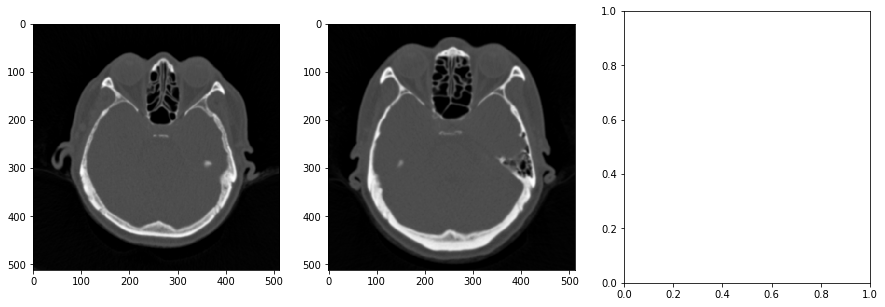

In [105]:
interactive_plot = interactive(f, files=range(0, len(files), 3), sequence=range(30))
interactive_plot

In [90]:
def f2(files, sequence):
    fig = plt.figure(figsize=(15, 5))
    print(files)
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(contrast_total_files[files][sequence], cmap='gray')

    fig.add_subplot(1, 3, 2)
    plt.imshow(contrast_total_files[files + 1][sequence], cmap='gray')

    fig.add_subplot(1, 3, 3)
    plt.imshow(contrast_total_files[files + 2][sequence], cmap='gray')

In [91]:
interactive_plot = interactive(f2, files=range(0, len(files), 3), sequence=range(30))
interactive_plot

interactive(children=(Dropdown(description='files', options=(0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 3…

# 3. Training

### 결정 사항

1. Sequence마다 다르게 할 것인가.
    - 우선 같이 해봐도 좋을 것 같다.

### 단계

1. 장비 통일한다.
    - 현재 장비가 3개
    
    
2. Segmentation
    - SKULL을 딴다.
    - INNER을 딴다.
    
3. Augmentation
    - Rotation
    - Brightness 
    - Size